In [5]:
!pip install pyts



In [40]:
import numpy as np
import matplotlib.pyplot as plt
from pyts.decomposition import SingularSpectrumAnalysis
import scipy.io as sc
from scipy.signal import stft, bode, butter, lfilter,freqz
from scipy import signal

# Diferentes Filtros

In [7]:
from scipy.signal import butter, lfilter

def butter_bandpass(lowcut, highcut, fs, order):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

def butter_lowpass(cutoff, fs, order):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)    
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y
def butter_lowpass_bode (b ,a):
    angularFreq, freqResponse, phaseResponse = scipy.signal.bode(scipy.signal.lti(b, a))

    return angularFreq, freqResponse, phaseResponse

def butter_bandpass_bode (b ,a):
    angularFreq, freqResponse, phaseResponse = scipy.signal.bode(scipy.signal.lti(b, a))

    return angularFreq, freqResponse, phaseResponse

# Sismo Local

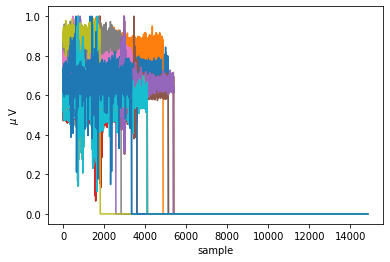

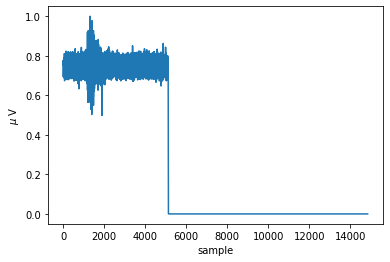

In [8]:
dataLoc = sc.loadmat('sisLoc.mat')#retorna los datos que lee de matlab
dataLoc.keys() # variables del diccionario

Y = dataLoc['Y']# variables
fs1 = dataLoc['fs']#frecuencia de emuestreo que regista el acelerometro

plt.plot(Y.T)#trasponer
plt.xlabel('sample')
plt.ylabel('$\mu$ V')
plt.show()
sampleSignal = Y[0,:] # se extrae una señal de la base de datos
plt.figure
plt.plot(sampleSignal)
plt.xlabel('sample')
plt.ylabel('$\mu$ V')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


<Figure size 432x288 with 0 Axes>

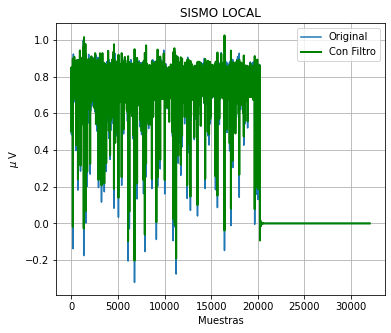

In [23]:
#------------------------------------------------------fILTRADO
fs = 102.0 #Debe cumplir el principio de Nyquist
lowcut = 1
highcut = 50
order = 6

signalFilteredLoc = np.zeros((21,32000))

for i in range(0,21):
  signalFilteredLoc[i,:] = butter_lowpass_filter(Y[i,:],highcut, fs, order)

plt.figure()
plt.figure(figsize=(20,5))
plt.subplot(1,3,1), plt.plot(Y[0,:], label='Original');
plt.subplot(1,3,1), plt.plot(signalFilteredLoc[0,:],'g',linewidth=2, label='Con Filtro');
plt.title("SISMO LOCAL"), plt.xlabel('Muestras'),plt.ylabel('$\mu$ V')
plt.grid()
plt.legend()




<Figure size 432x288 with 0 Axes>

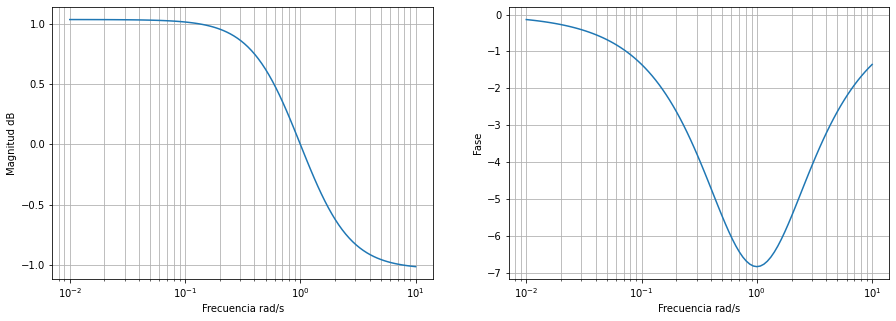

In [63]:

b,a= butter_lowpass(highcut, fs,order)
sys = (b,a) # Creamos el sistema
w, mag, phase = signal.bode(sys) # Diagrama de bode: frecuencias, magnitud y fase


ax1.semilogx(w, mag) # Eje x logarítmico
ax2.semilogx(w, phase) # Eje x logarítmico

plt.figure()
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.semilogx(w,mag)
plt.xlabel('Frecuencia rad/s')
plt.ylabel('Magnitud dB')
plt.grid(True, which="both")

plt.subplot(1,2,2)
plt.semilogx(w,phase)
plt.xlabel('Frecuencia rad/s')
plt.ylabel('Fase')
plt.grid(True, which="both")



# Separar las señales

In [66]:
LOCAL = signalFilteredLoc
Grup= 3
SSA= SingularSpectrumAnalysis(window_size=Grup)

# Sismo Regional

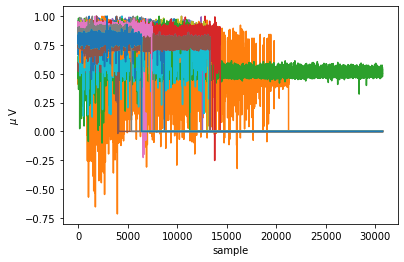

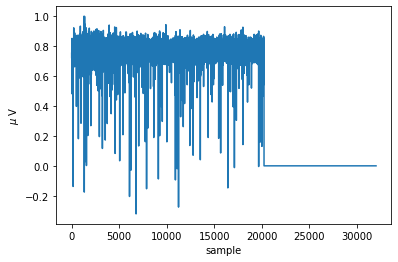

In [31]:
dataReg = sc.loadmat('sisReg.mat')#retorna los datos que lee de matlab
dataReg.keys() # variables del diccionario

X = dataReg['Y']#Son variables
fs = dataReg['fs']#frecuencia de emuestreo que regista el acelerometro

plt.plot(X.T)#trasponer
plt.xlabel('sample')
plt.ylabel('$\mu$ V')
plt.show()

sampleSignal = Y[0,:] # se extrae una señal de la base de datos
plt.figure
plt.plot(sampleSignal)
plt.xlabel('sample')
plt.ylabel('$\mu$ V')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


<Figure size 432x288 with 0 Axes>

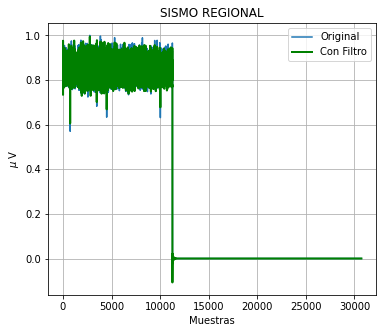

In [38]:
#------------------------------------------------------fILTRADO
fs = 102.0 #Debe cumplir el principio de Nyquist
lowcut = 1
highcut = 50
order = 6

signalFilteredReg = np.zeros((21,30720))

for i in range(0,21):
  signalFilteredReg[i,:] = butter_lowpass_filter(X[i,:],highcut, fs, order)

plt.figure()
plt.figure(figsize=(20,5))
plt.subplot(1,3,1), plt.plot(X[0,:], label='Original');
plt.subplot(1,3,1), plt.plot(signalFilteredReg[0,:],'g',linewidth=2, label='Con Filtro');
plt.title("SISMO REGIONAL"), plt.xlabel('Muestras'),plt.ylabel('$\mu$ V')
plt.grid()
plt.legend()

# Sismo Tele

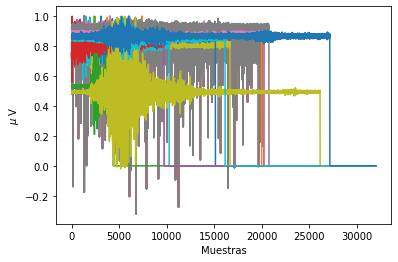

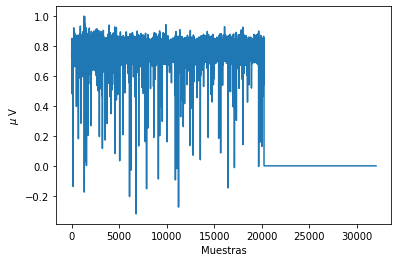

In [36]:
dataTele = sc.loadmat('sisTele.mat')#retorna los datos que lee de matlab
dataReg.keys() # variables del diccionario

Z = dataTele['Y']#Son variables
fs3 = dataTele['fs']#frecuencia de emuestreo que regista el acelerometro

plt.plot(Z.T)#trasponer
plt.xlabel('Muestras')
plt.ylabel('$\mu$ V')
plt.show()

sampleSignal = Y[0,:] # se extrae una señal de la base de datos
plt.figure
plt.plot(sampleSignal)
plt.xlabel('Muestras')
plt.ylabel('$\mu$ V')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


<Figure size 432x288 with 0 Axes>

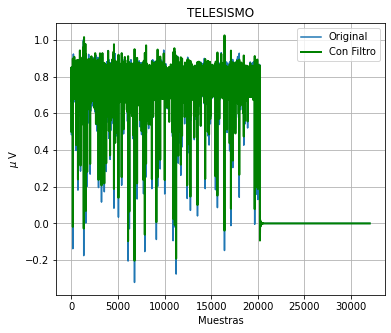

In [37]:
#------------------------------------------------------fILTRADO
fs = 102.0 #Debe cumplir el principio de Nyquist
lowcut = 1
highcut = 50
order = 6

signalFilteredTele = np.zeros((21,32000))

for i in range(0,21):
  signalFilteredTele[i,:] = butter_lowpass_filter(Z[i,:],highcut, fs, order)

plt.figure()
plt.figure(figsize=(20,5))
plt.subplot(1,3,1), plt.plot(Z[0,:], label='Original');
plt.subplot(1,3,1), plt.plot(signalFilteredTele[0,:],'g',linewidth=2, label='Con Filtro');
plt.title("TELESISMO"), plt.xlabel('Muestras'),plt.ylabel('$\mu$ V')
plt.grid()
plt.legend()

# Descomponer Funciones